In [7]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
start, duration = 1369914149, 1024
end = start + duration

ts = TimeSeries.read(
    'dc_out/K-K1_HOFT_DC-1369914149-1024.gwf',
    'K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ',
    start=start,
    end=end,
)

ts_raw = TimeSeries.read(
    'dc_out/raw.h5',
    'K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ',
    start=start,
    end=end,
)

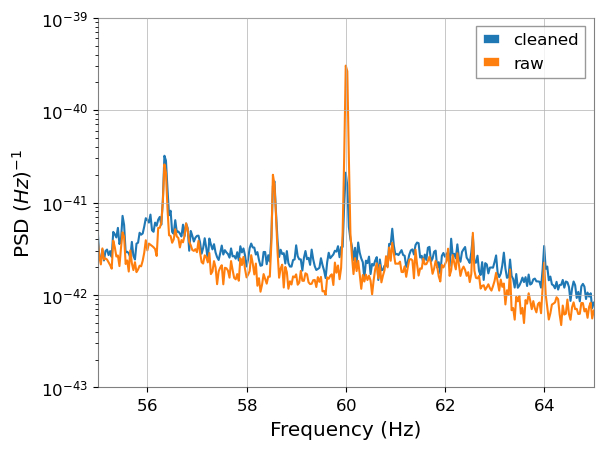

In [15]:
ts_psd = ts.psd(fftlength=32, overlap=16, method='median')
ts_raw_psd = ts_raw.psd(fftlength=32, overlap=16, method='median')

plt.figure()
plt.plot(ts_psd.frequencies, ts_psd, label='cleaned')
plt.plot(ts_raw_psd.frequencies, ts_raw_psd, label='raw')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'PSD $(Hz)^{-1}$')
# plt.xscale('log')
plt.yscale('log')
plt.xlim([55, 65])
plt.ylim([1e-43, 1e-39])
plt.legend()
plt.show()